# Challenge 1: The banknote-authentication data set problem

We will perform a nearly realistic analysis of the data set bank note authentication that can be downloaded from https://archive-beta.ics.uci.edu/dataset/267/banknote+authentication

## Data set description

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
These features are:
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

## Task description
We have a binary classification problem. The assignment can be divided in several parts:
    
    1. Load the data and pretreatment.
    2. Data exploring by Unsupervised Learning techniques.
    3. Construction of several models of Supervised Learning.

### 1. Data pretreatment

Load the data and look at it: It is needed some kind of scaling? Why? Are the data points sorted in the original data set? Can it generate problems? How can this be solved?

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from seaborn import pairplot

Load the dataset "data_banknote_authentication.txt" into the environment

In [99]:
# Obtain the dataset 
file= "data_banknote_authentication.csv"

dataset= pd.read_csv(file, header=0)

# Print the first five rows of the dataset:
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


We can proceed **scaling** the dataset, so that the features have similar ranges and variances 

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Scaling the data:
scaler = StandardScaler()

# Excluding the "class" column, the only one non-continuos, for scaling:
scaled_features = scaler.fit_transform(dataset.drop("class", axis=1))

# Creating a new dataframe with the scaled features:
scaled_data = pd.DataFrame(scaled_features, columns=dataset.columns[:-1])

# Adding back the "class" column to the scaled data:
scaled_data["class"] = dataset["class"].values

# Output:
scaled_data.head()

,variance,skewness,curtosis,entropy,class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0


We can notice that the data points in the original dataset are sorted, in the sense that the classes are divided. 
To avoid bias problems in the algorithms we will see later, we can shuffle the data:

In [101]:
import random

# Shuffling the data to ensure random distribution:
shuffled_data = shuffle(scaled_data, random_state=random.randint(0,1000))

# Output:
shuffled_data.head()

,variance,skewness,curtosis,entropy,class
199,1.918716,0.673668,-0.978152,0.424134,0
696,0.426243,1.012262,-0.527708,-1.126174,0
45,-0.429540,1.302892,-1.203290,-3.005238,0
738,0.173590,1.279967,-0.478189,-0.229089,0
792,-1.114652,-0.250068,0.241727,0.671024,1


Comparison between classes on the same variable: 

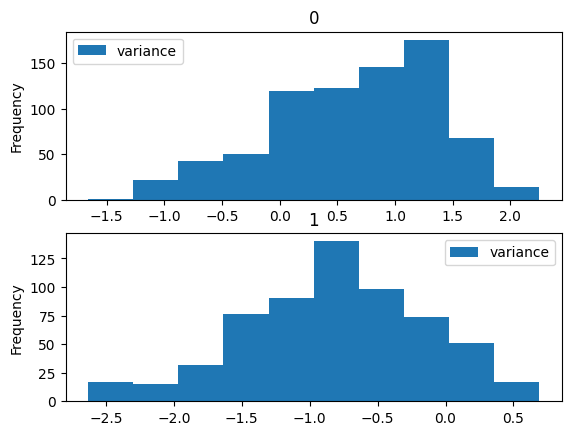

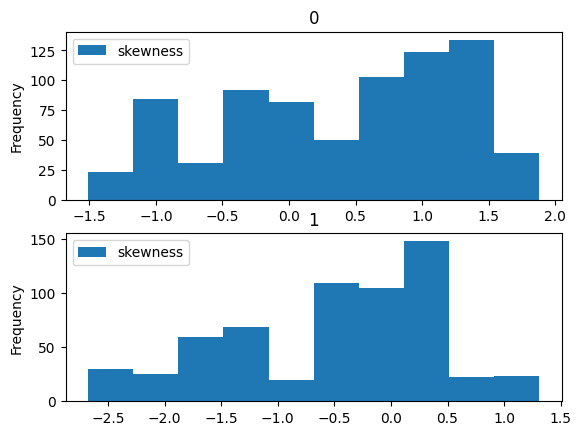

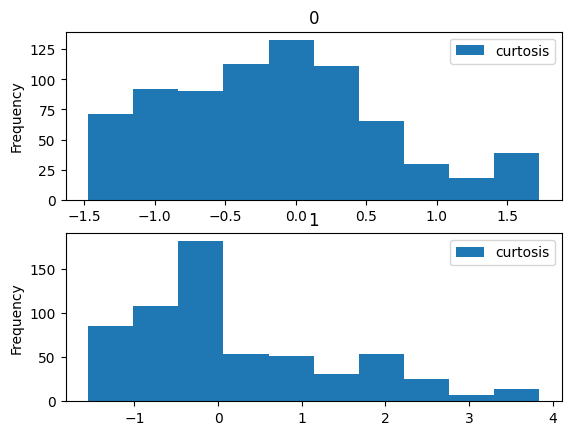

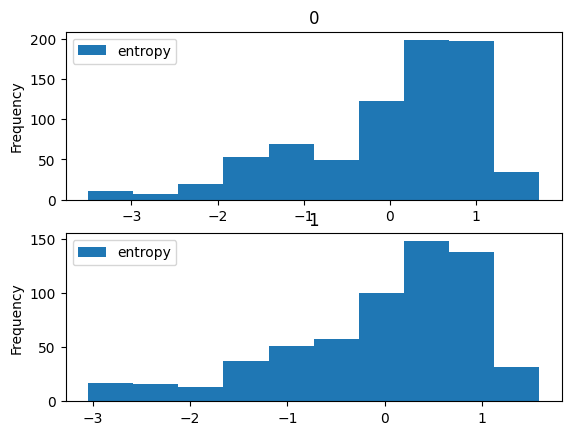

In [102]:
ax = shuffled_data.plot.hist(column = ['variance'],by = 'class')
ax = shuffled_data.plot.hist(column = ['skewness'],by = 'class')
ax = shuffled_data.plot.hist(column= ['curtosis'], by= 'class')
ax = shuffled_data.plot.hist(column = ['entropy'],by = 'class')


We notice that entropy is the only variable that does not show substantial differences in distribution between elements of class 0 and 1.

### 2. Unsupervised Learning

Use PCA and plot the two first components colouring according with the class. Are the classes linearly separable in this projection? What happens when I applied k-means with two classes in this space? And if I use all the coordinates? Try also t-SNE for projection and DBSCAN for the clustering and comment on the results.

#### 2.1 PCA


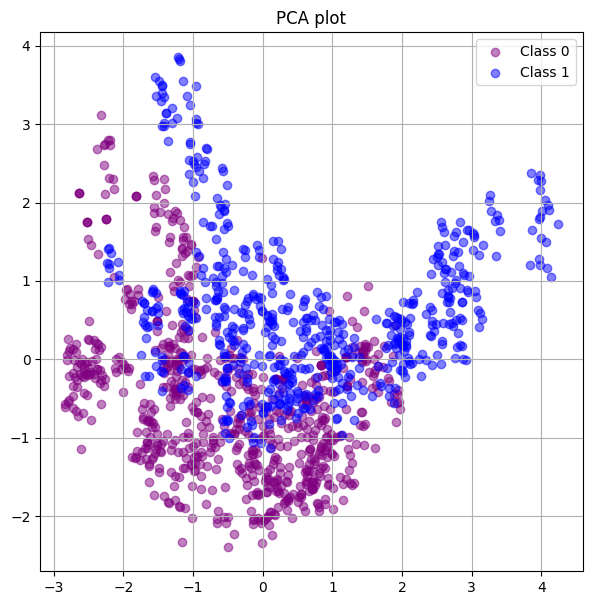

In [103]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

X = shuffled_data.drop("class", axis=1)
y = shuffled_data["class"]

# Applying PCA and reducing the data's dimensions to two for the entire dataset:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(
    data=X_pca, columns=["component 1", "component 2"]
)
pca_df["class"] = y.values

# Plotting the two components for the entire dataset:
plt.figure(figsize=(7,7))

# Separating plots for each class:
for class_value in [0, 1]:
    subset = pca_df[pca_df["class"] == class_value]
    color = "purple" if class_value == 0 else "blue" 
    plt.scatter(
        subset["component 1"],
        subset["component 2"],
        label=f"Class {class_value}",
        alpha=0.5,
        color=color,
    )

plt.title("PCA plot")
plt.legend()
plt.grid(True)
plt.show()

It's difficult to distinguish between the two classes clearly; we can try applying k-means clustering algorithm to find two well-separated clusters.

#### 2.2 K-MEANS CLUSTERING
PCA is frequently used before running K-means to simplify the data. This simplification helps K-means work better by making the data easier to interpret. Essentially, PCA makes the data more manageable for K-means, potentially making its results more accurate.

C:\Users\elico\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


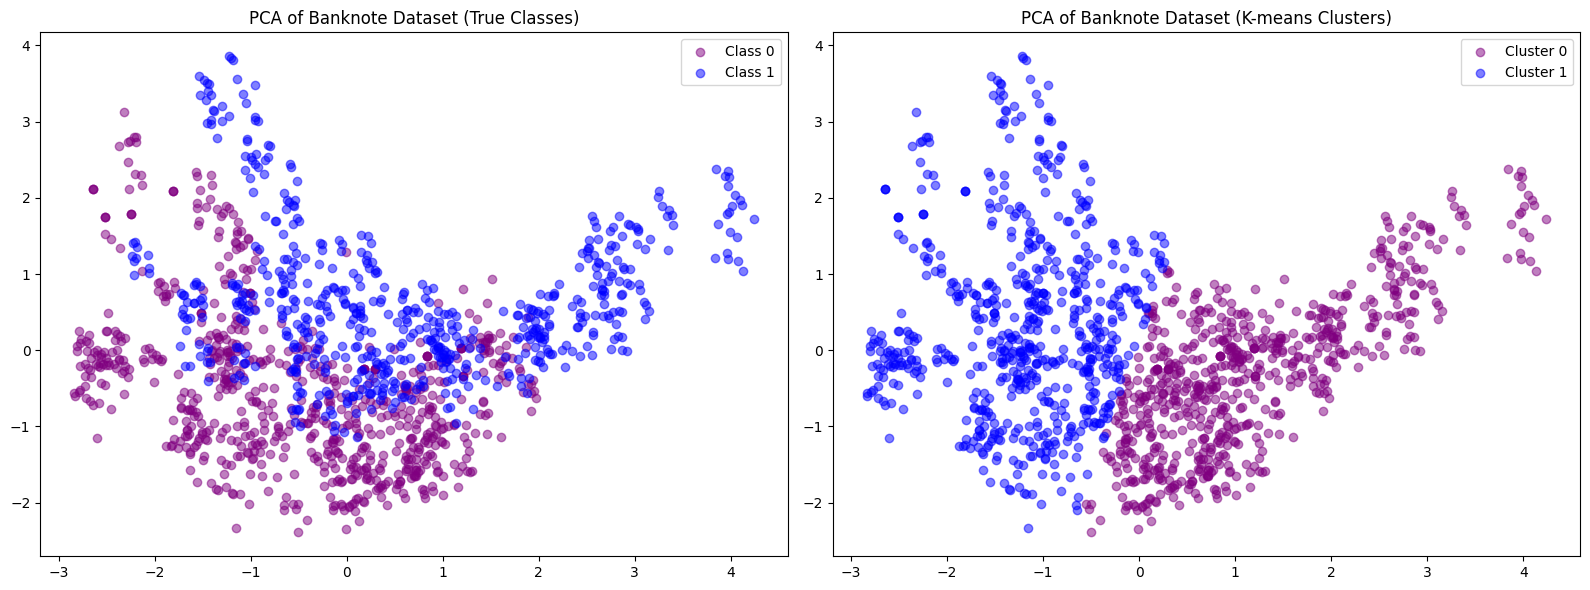

In [104]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca_df["class"] = y.values  

# Applying K-means to the PCA-reduced dataset:
kmeans = KMeans(n_clusters=2, random_state=42)
pca_df["kmeans_pca_class"] = kmeans.fit_predict(X_pca)

# Plotting the results for the dataset:
plt.figure(figsize=(16, 6))

# Plotting PCA-reduced dataset with the true class labels:
plt.subplot(1, 2, 1)

# Separating plots for each class:
colors = ['purple', 'blue'] 
for class_value, color in zip([0, 1], colors):
    subset = pca_df[pca_df["class"] == class_value]
    plt.scatter(
        subset["component 1"],
        subset["component 2"],
        label=f"Class {class_value}",
        alpha=0.5,
        c=color
    )
plt.title("PCA of Banknote Dataset (True Classes)")
plt.legend()

# Plotting PCA-reduced dataset with K-means clusters:
plt.subplot(1, 2, 2)

# Separating plots for each K-means cluster:
cluster_colors = ['purple', 'blue']  
for cluster_value, color in zip([0, 1], cluster_colors):
    subset = pca_df[pca_df["kmeans_pca_class"] == cluster_value]
    plt.scatter(
        subset["component 1"],
        subset["component 2"],
        label=f"Cluster {cluster_value}",
        alpha=0.5,
        c=color 
    )
plt.title("PCA of Banknote Dataset (K-means Clusters)")
plt.legend()

# Output:
plt.tight_layout()
plt.show()

PCA with K-means identifies two clusters that do not correspond to the two classes present in the dataset, it may indicate that the data structure has not been adequately captured by this combination of algorithms.

#### 2.3 t-SNE 
We can try to use t-SNE to visualize high-dimensional data in a two and three-dimensional space.

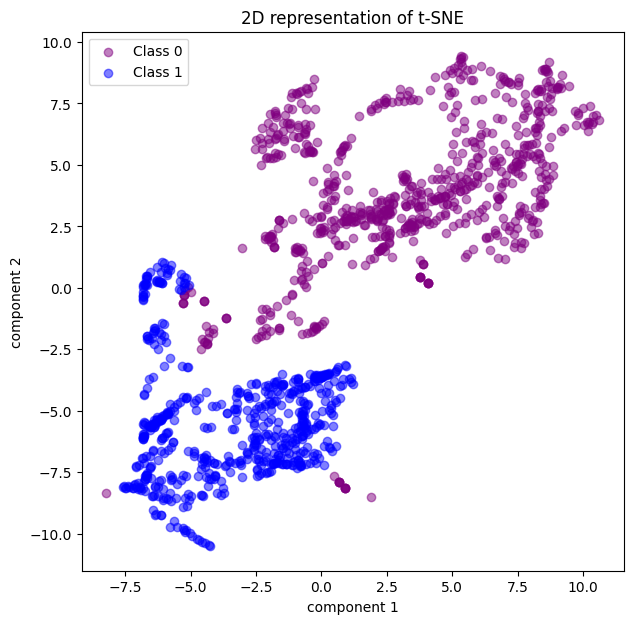

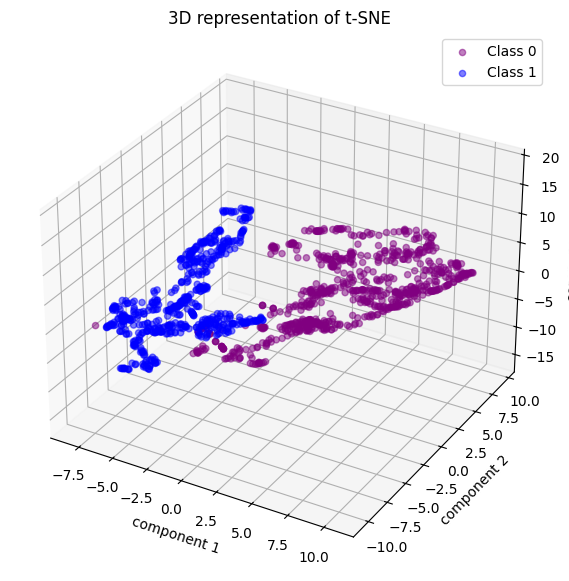

In [105]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

X_scaled = shuffled_data.drop("class", axis=1) 
label = shuffled_data["class"]  

# Applying t-SNE by reducing the data size to three components
X_embedded = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=50).fit_transform(X_scaled)

fig, ax = plt.subplots(figsize=(7,7))
colors = ['purple', 'blue']
# Cycling on the unique values of cluster labels
for i, cluster in enumerate(np.unique(label)):
    # Selecting only the data that belongs to that cluster
    subset = X_embedded[label == cluster]
    # Drawing scatter plots for each cluster
    ax.scatter(subset[:, 0], subset[:, 1], c=colors[i], label=f"Class {cluster}", alpha=0.5)
ax.set_title('2D representation of t-SNE')
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.legend()  
plt.show()


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
colors = ['purple', 'blue']
# Cycling on the unique values of cluster labels
for i, cluster in enumerate(np.unique(label)):
    # Selecting only the data that belongs to that cluster
    subset = X_embedded[label == cluster]
    # Drawing scatter plots for each cluster
    ax.scatter(subset[:, 0], subset[:, 1], subset[:, 2], c=colors[i], label=f"Class {cluster}", alpha=0.5)
ax.set_title('3D representation of t-SNE')
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
ax.legend()
plt.show()

Ideally, data points belonging to different classes should be visually separated in the t-SNE plot. Clear separation indicates that t-SNE has effectively captured the underlying structure of the data and that distinct groups exist, which is more or less what we see in the 3D plot.

#### 2.4 DBSCAN 
Now let's applay the DBSCAN algorithm, used to identify clusters of points in a dataset based on their density.

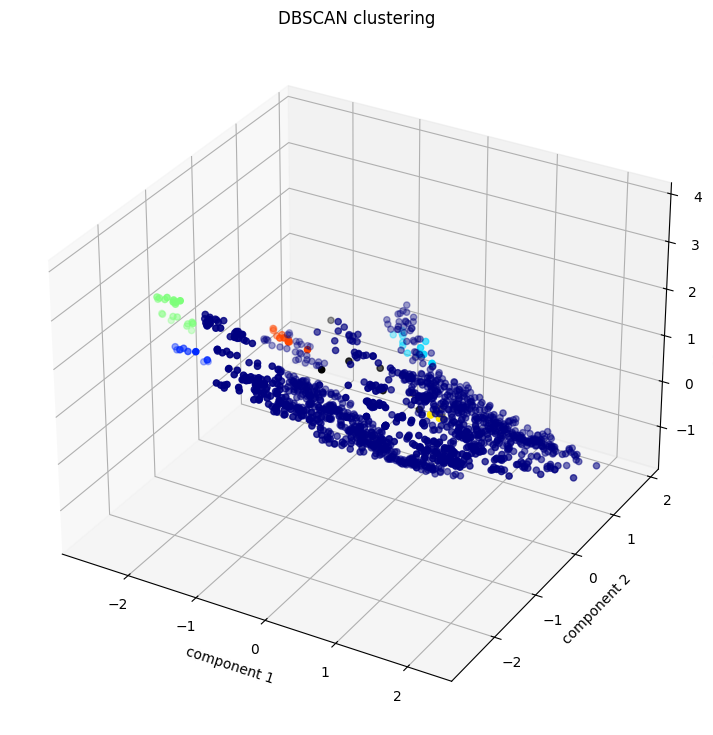

In [106]:
from sklearn.cluster import DBSCAN

X_scaled = shuffled_data.drop('class', axis=1).values 

# Appling DBSCAN to the scaled data
dbscan = DBSCAN(eps=0.6, min_samples=10).fit(X_scaled)

# Creating the 3D graph to visualize DBSCAN clusters
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

# Coloring the points according to the cluster labels obtained from DBSCAN
# The points considered 'noise' by DBSCAN have label -1
unique_labels = set(dbscan.labels_)
colors = [plt.cm.jet(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Using black for noise
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan.labels_ == k)

    # Drawing the points that are part of the cluster
    ax.scatter(X_scaled[class_member_mask, 0], X_scaled[class_member_mask, 1], X_scaled[class_member_mask, 2], c=[col])

ax.set_title('DBSCAN clustering')
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
plt.show()



In this case clustering with DBSCAN is not efficient, because a plot resulting from DBSCAN clustering should show distinct clusters of points, separated by sparse regions, with outliers identified as noise points. In the graph above the different cluster are all merged together and we can't see clear separation.

### 3. Supervised Learning

Generate a subset of the data of 372 elements that would be saved as test set. With the rest of the data generate the following models: Logistic Regression, Decision tree (use the ID3 algorithm), Naive Bayesian and k-NN.

Investigate the effect of regularization (when possible) and use cross validation for setting the hyper-parameters when needed.

Compare the performances in terms of accuracy, precision, recall and F1-score on the test set. Comment these results at the light of those obtained from the Unsupervised Learning analysis. Could you propose a way to improve these results?     



**Train/Test split**:

The test set consists of 372 elements, we extract 'class' because is the element we want to predict.

In [107]:
from sklearn.model_selection import train_test_split
random_state= random.randint(0,1000)
# Calculating the proportion for the test size:
test_size = 372 / len(shuffled_data)

# Removing the "class" column:
X = shuffled_data.drop("class", axis=1)

# Extracting target variable:
y = shuffled_data["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size,random_state=random_state)

Now we can train the data using different models:
- Logistic regression
- Decision Tree
- Gaussian Naive Bayes
- K nearest neighbours



#### 3.1 Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


log_regression= LogisticRegression(solver="liblinear",random_state=random_state)
#hyperparameters for cross validation
log_reg_params = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l1", "l2"]}

#set up for the grid search 
log_reg_cv = GridSearchCV(log_regression, log_reg_params, cv=5, scoring="accuracy")

#Train the model 
log_reg_cv.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=401, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

#### 3.2 Decision tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

# Using entropy to make it similar to ID3
decision_tree = DecisionTreeClassifier(
    criterion="entropy", random_state=random_state)

# Train the model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=401)

#### 3.3 Gaussian Naive Bayes

In [110]:
from sklearn.naive_bayes import GaussianNB

naive_bayes= GaussianNB()
# train the model 
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [111]:
#Cross validation using KFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y = y_train.values if isinstance(y_train, pd.Series) else y_train
num_folds= 5
kf= KFold(n_splits=num_folds)
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train_b, X_test_b = X[train_index], X[test_index]
    y_train_b, y_test_b = y[train_index], y[test_index]
    # Creazione e addestramento del modello Gaussian Naive Bayes
    model = GaussianNB()
    model.fit(X_train_b, y_train_b)

    y_pred = model.predict(X_test_b)
    accuracy = accuracy_score(y_test_b, y_pred)
    precision = precision_score(y_test_b, y_pred)
    recall = recall_score(y_test_b, y_pred)
    f1 = f1_score(y_test_b, y_pred)

    # Memorizzazione delle metriche
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

accuracies, precisions, recalls,f1_scores

([0.825, 0.86, 0.845, 0.84, 0.82],
 [0.8275862068965517,
  0.8681318681318682,
  0.8289473684210527,
  0.8255813953488372,
  0.8148148148148148],
 [0.782608695652174,
  0.8315789473684211,
  0.7777777777777778,
  0.8068181818181818,
  0.7586206896551724],
 [0.8044692737430168,
  0.849462365591398,
  0.802547770700637,
  0.8160919540229885,
  0.7857142857142857])

#### 3.4 K Nearest Neaighbours

In [112]:
from sklearn.neighbors import KNeighborsClassifier

#The number of neighbors will vary:
knn_parameters = {"n_neighbors": range(1, 11)}

#set up for the grid search 
knn_cv = GridSearchCV(KNeighborsClassifier(), knn_parameters, cv=5, scoring="accuracy")

# Train the model
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)}, scoring='accuracy')

**Evaluate the models**


In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Extracting best models from the grid search:
best_log_reg = log_reg_cv.best_estimator_
best_knn = knn_cv.best_estimator_

# Compiling models for evaluation:
models = {
    "Logistic Regression": best_log_reg,
    "Decision Tree": decision_tree,
    "Naive Bayesian": naive_bayes,
    "k-NN": best_knn,
}

# Initializing a dictionary to store evaluation metrics:
metrics = {name: {} for name in models.keys()}

for name, model in models.items():
    y_pred = model.predict(X_test)
    metrics[name]["accuracy"] = accuracy_score(y_test, y_pred)
    metrics[name]["precision"] = precision_score(y_test, y_pred)
    metrics[name]["recall"] = recall_score(y_test, y_pred)
    metrics[name]["f1_score"] = f1_score(y_test, y_pred)

# Output the best parameters for Logistic Regression and k-NN, 
# and the evaluation metrics for all models
results_df = pd.DataFrame(metrics).T
results_df.index.name = 'Model'

# Output dei risultati
print("Best parameters for Logistic Regression:", log_reg_cv.best_params_)
print("Best parameters for k-NN:", knn_cv.best_params_)
print("\nEvaluation Metrics:")
print(results_df)

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Best parameters for k-NN: {'n_neighbors': 1}

Evaluation Metrics:
                     accuracy  precision    recall  f1_score
Model                                                       
Logistic Regression  0.997312   0.994048  1.000000  0.997015
Decision Tree        0.983871   0.976331  0.988024  0.982143
Naive Bayesian       0.852151   0.868421  0.790419  0.827586
k-NN                 0.994624   0.988166  1.000000  0.994048
